In [18]:
import torch
import torch.nn as nn
from unet import Unet
from loader import ImageMaskGenerator
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim import Adam
from tqdm import tqdm
from losses import dice_loss

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [20]:
model = Unet().to(device)

In [21]:
transformer = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

In [22]:
train_dataset = ImageMaskGenerator('benign', transform=transformer)

In [23]:
test_dataset = ImageMaskGenerator('benign', transform=transformer)

In [24]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True, pin_memory=True)

In [8]:
test_loader = DataLoader(test_dataset, batch_size = 16, shuffle = True, pin_memory=True)

In [9]:
loss_fun = dice_loss
optimizer = Adam(model.parameters())
n_epochs = 20

In [ ]:
import torch
from tqdm import tqdm

best_loss = float('inf')  
best_weights = None

for epoch in tqdm(range(n_epochs), desc='Epochs'):
    model.train()
    
    epoch_loss = 0
    for i, (image, mask) in enumerate(train_loader):
        image = image.to(device)
        mask = mask.to(device)

        optimizer.zero_grad()

        predictions = model(image)
        loss = loss_fun(predictions, mask)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    model.eval()   
    val_loss = 0
    with torch.no_grad():
        for val_image, val_label in test_loader:
            val_image = val_image.to(device)
            val_label = val_label.to(device)

            val_preds = model(val_image)
            val_loss += loss_fun(val_preds, val_label).item()

    val_loss /= len(test_loader)

    if val_loss < best_loss:
        best_loss = val_loss
        best_weights = model.state_dict().copy()

    print(f'Epoch: {epoch + 1}, Training Loss: {epoch_loss / len(train_loader):.4f}, Validation Loss: {val_loss:.4f}')

if best_weights is not None:
    model.load_state_dict(best_weights)
    print('Best model weights loaded.')


In [13]:
model.eval()
with torch.no_grad():
    for image, _ in test_loader:

        image = image.to(device)
        preds = model(image)

        

In [14]:
a = preds.squeeze().to('cpu')
b = _.squeeze().to('cpu')

In [15]:
from  matplotlib.pyplot import imshow

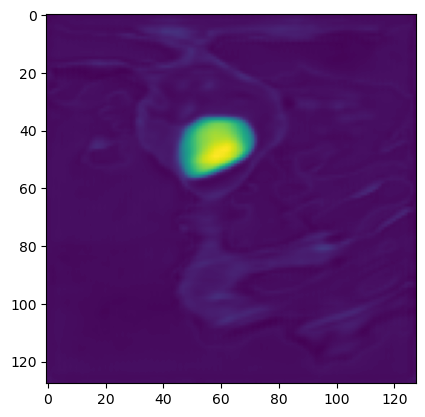

In [16]:
imshow(a[0])

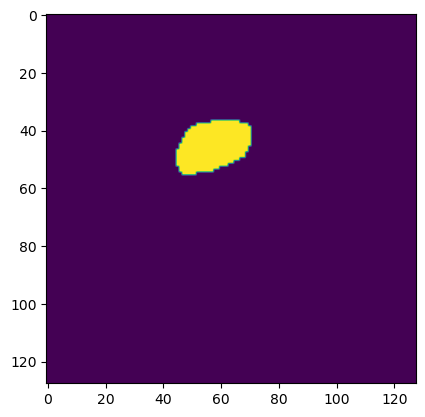

In [17]:
imshow(b[0])

In [19]:
#torch.save(model.state_dict(), 'weights.pth') # weights
#torch.save(model, 'complete_model.pth') # model